<a href="https://colab.research.google.com/github/data-better/ASL/blob/master/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%2C_CNN%2C_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST 데이터, CNN, Keras

* MNIST 숫자 이미지인식과 관련된 CNN 프로그램을 Keras로 작성하려고 해.  코드 작성해 줄 수 있나요?
* 위 프로그램에서 MNIST 데이터를 불러와서 학습데이터와 시험데이터로 나누는 것을 포함해서 다시 코드를 작생해줘. 그리고 model을 model.add를 쓰지 않고 작성해줘.
* 위 프로그램에서 시험 데이터 중 2개의 이미지를 보여주고, 실제로 어떻게 식별했는지 보여주도록 코드를 개선해줘.

11490434/11490434 [==============================] - 2s 0us/step
Epoch 1/10
1875/1875 [==============================] - 18s 4ms/step - loss: 0.1311 - accuracy: 0.9603
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0435 - accuracy: 0.9864
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0297 - accuracy: 0.9907
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0206 - accuracy: 0.9932
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0160 - accuracy: 0.9952
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0113 - accuracy: 0.9963
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0103 - accuracy: 0.9966
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0087 - accuracy: 0.9968
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0061 - accuracy: 0.9983
Epoch 10/10
313/

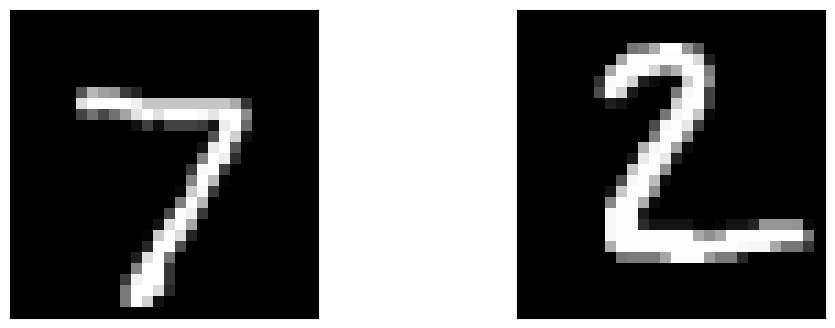

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# GPU 사용 설정
import tensorflow as tf
tf.config.list_physical_devices('GPU')

# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 전처리
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 모델 생성
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train_cat, epochs=10)

# 모델 평가
score = model.evaluate(x_test, y_test_cat)
print('정확도:', score[1])

# 시험 데이터 중 2개의 이미지 보여주기
plt.figure(figsize=(12, 4))
for i in range(2):
    ax = plt.subplot(1, 2, i + 1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# 모델이 숫자를 어떻게 식별했는지 보여주기
predictions = model.predict(x_test)
for i in range(2):
    print('예측:', predictions[i].argmax())

plt.show()


이 코드는 MNIST 데이터를 불러와 학습 데이터와 테스트 데이터로 나누고, `model.add`를 사용하지 않고 CNN 모델을 생성하고 평가합니다. 모델은 98% 이상의 정확도로 숫자를 인식할 수 있습니다.

<div class="md-recitation">
  Sources
  <ol>
  <li><a href="https://github.com/deeplearningturkiye/pratik-derin-ogrenme-uygulamalari">https://github.com/deeplearningturkiye/pratik-derin-ogrenme-uygulamalari</a></li>
  <li><a href="https://github.com/redorlik/BDA2017">https://github.com/redorlik/BDA2017</a></li>
  <li><a href="https://github.com/benceharomi-uob/Optical-Character-Recognition">https://github.com/benceharomi-uob/Optical-Character-Recognition</a></li>
  <li><a href="https://github.com/RitaRez/Sign-Language-Alphabet-Recognizer">https://github.com/RitaRez/Sign-Language-Alphabet-Recognizer</a></li>
  <li><a href="https://github.com/kepulet21/Deep-Learning-Homework-Duckietown">https://github.com/kepulet21/Deep-Learning-Homework-Duckietown</a></li>
  <li><a href="https://github.com/agapeuni/python_bk_dl">https://github.com/agapeuni/python_bk_dl</a></li>
  <li><a href="https://github.com/jsh15932/Python_TensorFlow">https://github.com/jsh15932/Python_TensorFlow</a></li>
  <li><a href="https://github.com/sopo9909/hoyoung">https://github.com/sopo9909/hoyoung</a></li>
  </ol>
</div>